## Data cleaning and EDA for the Airbnb data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data from google drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [194]:
df_newyork = pd.read_csv("/content/drive/MyDrive/Capstone/listing_NEWYORK.csv", low_memory=False)
df_newjersey = pd.read_csv("/content/drive/MyDrive/Capstone/listing_NEWJERSEY.csv", low_memory=False)
df_washington_DC = pd.read_csv("/content/drive/MyDrive/Capstone/listing_WASHINGTONDC.csv", low_memory=False)

### Creating a new column with name location to identify the location of the airbnb

In [195]:
df_newyork['location'] = 'New york' # assigning New york column to New york dataset

In [196]:
df_newjersey['location'] = 'New Jersey'

In [197]:
df_washington_DC['location'] = 'Washington D.C'

In [198]:
df_newyork.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN,New york
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN,New york
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN,New york
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN,New york
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN,New york


In [199]:
df_newjersey.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,62033,LARGE BEDROOM IN HISTORIC DISTRICT,301435,Fred,NaN,North,40.77146,-74.17054,Private room,80,2,74,2022-10-23,0.52,1,365,2,NaN,New Jersey
1,1975091,"Hello World, Welcome to Newark!!!!",9169027,Kimberly B,NaN,West,40.74462,-74.19848,Private room,115,10,86,2022-12-16,0.82,5,272,7,NaN,New Jersey
2,2159185,Hello World! Zen room. New photos coming soon.,9169027,Kimberly B,NaN,West,40.74478,-74.19575,Private room,52,10,96,2022-11-02,0.90,5,362,5,NaN,New Jersey
3,2277901,Luxury Muwuyu Queen enSuite @MushaindoroHS,11308972,Tendai,NaN,West,40.73473,-74.24575,Private room,65,4,50,2022-06-17,0.48,3,334,3,NaN,New Jersey
4,2278440,Luxury Musasa Queen Suite @ MushaindoroHS,11308972,Tendai,NaN,West,40.73471,-74.24787,Private room,55,3,44,2022-11-23,0.41,3,328,7,NaN,New Jersey


In [200]:
df_washington_DC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,196429,"Takoma Garden apt-Lush yard,pets ok",956417,Julia,NaN,"Takoma, Brightwood, Manor Park",38.96995,-77.01984,Entire home/apt,125,31,7,2022-04-01,0.06,1,358,1,NaN,Washington D.C
1,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86177,-76.98966,Private room,67,31,81,2022-07-06,0.55,1,365,4,NaN,Washington D.C
2,3943,Historic Rowhouse Near Monuments,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91066,-77.00438,Private room,75,1,449,2022-12-04,2.71,4,355,13,Hosted License: 5007242201001033,Washington D.C
3,4967,"DC, Near Metro",7086,Edward,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91409,-76.99368,Private room,500,1125,31,2016-09-22,0.21,3,349,0,NaN,Washington D.C
4,888029,PERFECT ROOM FOR INTERNS OR STUDENTS,315148,John,NaN,"Brightwood Park, Crestwood, Petworth",38.93656,-77.02377,Private room,35,31,15,2022-12-06,0.13,35,244,3,NaN,Washington D.C


### Printing shape of datasets


In [201]:
print("Number of Airbnb listings in NEW YORK is ", df_newyork.shape[0])
print("Number of Airbnb listings in NEW JESRSEY is ", df_newjersey.shape[0])
print("Number of Airbnb listings in WASHINGTON D.C is ", df_washington_DC.shape[0])

Number of Airbnb listings in NEW YORK is  41533
Number of Airbnb listings in NEW JESRSEY is  1260
Number of Airbnb listings in WASHINGTON D.C is  6217


In [202]:
df_newyork.neighbourhood_group.isna().sum()

0

In [203]:
df_newjersey.neighbourhood_group.isna().sum()

1260

In [204]:
df_washington_DC.neighbourhood_group.isna().sum()

6217

### Info and data types for the dataset

In [205]:
df_newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41533 non-null  int64  
 1   name                            41520 non-null  object 
 2   host_id                         41533 non-null  int64  
 3   host_name                       41528 non-null  object 
 4   neighbourhood_group             41533 non-null  object 
 5   neighbourhood                   41533 non-null  object 
 6   latitude                        41533 non-null  float64
 7   longitude                       41533 non-null  float64
 8   room_type                       41533 non-null  object 
 9   price                           41533 non-null  int64  
 10  minimum_nights                  41533 non-null  int64  
 11  number_of_reviews               41533 non-null  int64  
 12  last_review                     

In [206]:
df_newjersey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1260 non-null   int64  
 1   name                            1260 non-null   object 
 2   host_id                         1260 non-null   int64  
 3   host_name                       1260 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   1260 non-null   object 
 6   latitude                        1260 non-null   float64
 7   longitude                       1260 non-null   float64
 8   room_type                       1260 non-null   object 
 9   price                           1260 non-null   int64  
 10  minimum_nights                  1260 non-null   int64  
 11  number_of_reviews               1260 non-null   int64  
 12  last_review                     10

In [207]:
df_washington_DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6217 non-null   int64  
 1   name                            6217 non-null   object 
 2   host_id                         6217 non-null   int64  
 3   host_name                       6217 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6217 non-null   object 
 6   latitude                        6217 non-null   float64
 7   longitude                       6217 non-null   float64
 8   room_type                       6217 non-null   object 
 9   price                           6217 non-null   int64  
 10  minimum_nights                  6217 non-null   int64  
 11  number_of_reviews               6217 non-null   int64  
 12  last_review                     49

### Summary of dataset

In [208]:
df_newyork.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.153300e+04,4.153300e+04,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000,32140.000000,41533.000000,41533.000000,41533.000000
mean,1.728318e+17,1.400636e+08,40.728292,-73.944526,221.978282,18.592204,26.204994,1.279287,20.626803,143.287771,7.983700
std,2.974371e+17,1.526932e+08,0.057145,0.055965,919.502236,30.699921,56.178847,1.935098,68.874393,144.279510,18.563894
min,2.595000e+03,2.438000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.835861e+07,1.491162e+07,40.687750,-73.982410,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,4.117861e+07,6.561181e+07,40.723830,-73.953156,131.000000,10.000000,5.000000,0.580000,1.000000,87.000000,1.000000
75%,5.477978e+17,2.418897e+08,40.762200,-73.924990,220.000000,30.000000,25.000000,1.880000,4.000000,312.000000,8.000000
max,7.741268e+17,4.899967e+08,40.911380,-73.710870,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000


In [209]:
df_newjersey.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.260000e+03,1.260000e+03,0.0,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1049.000000,1260.000000,1260.000000,1260.000000,0.0
mean,3.227006e+17,2.482281e+08,NaN,40.734886,-74.190626,126.019841,3.446032,28.088889,1.881697,11.066667,260.133333,11.598413,NaN
std,3.533176e+17,1.553622e+08,NaN,0.018309,0.021173,289.630041,6.638117,51.730606,1.748285,14.652458,128.887386,17.599029,NaN
min,6.203300e+04,1.727000e+04,NaN,40.686980,-74.248710,25.000000,1.000000,0.000000,0.020000,1.000000,0.000000,0.000000,NaN
25%,4.418791e+07,8.832780e+07,NaN,40.722282,-74.208505,51.000000,1.000000,2.000000,0.540000,2.000000,163.500000,1.000000,NaN
50%,5.334671e+07,2.478243e+08,NaN,40.735365,-74.188905,72.000000,1.000000,8.000000,1.290000,5.000000,339.000000,4.000000,NaN
75%,7.121360e+17,3.928982e+08,NaN,40.746493,-74.173433,142.000000,3.000000,33.000000,2.740000,12.000000,362.000000,15.000000,NaN
max,7.927869e+17,4.933660e+08,NaN,40.783610,-74.134010,8000.000000,83.000000,504.000000,10.980000,55.000000,365.000000,150.000000,NaN


In [210]:
df_washington_DC.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.217000e+03,6.217000e+03,0.0,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,4925.000000,6217.000000,6217.000000,6217.000000
mean,1.507328e+17,1.154536e+08,NaN,38.910146,-77.015140,178.202509,21.811163,51.725591,1.855131,28.792826,188.570372,14.320733
std,2.841390e+17,1.327067e+08,NaN,0.024366,0.030696,705.550802,40.717326,87.497018,2.355270,58.787649,138.698806,23.608094
min,3.686000e+03,4.492000e+03,NaN,38.820780,-77.109000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.084250e+07,1.601717e+07,NaN,38.897556,-77.034850,83.000000,2.000000,1.000000,0.320000,1.000000,59.000000,0.000000
50%,4.187946e+07,5.038247e+07,NaN,38.909550,-77.017540,119.000000,15.000000,14.000000,1.190000,2.000000,179.000000,3.000000
75%,5.353049e+07,1.747920e+08,NaN,38.922870,-76.995360,180.000000,31.000000,62.000000,2.730000,13.000000,340.000000,21.000000
max,7.855798e+17,4.915968e+08,NaN,38.992140,-76.909270,51534.000000,1125.000000,892.000000,88.950000,214.000000,365.000000,507.000000


# Grouping all three dataset of different locations

In [211]:
grouping_df = [df_newyork, df_newjersey, df_washington_DC]

In [212]:
final_df = pd.concat(grouping_df)

In [213]:
final_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN,New york
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN,New york
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN,New york
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN,New york
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN,New york
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,13853404,A Petite Elegance,81822679,Young,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,0,NaN,NaN,1,0,0,NaN,Washington D.C
6213,13894976,"Perfect location, wonderful home for a DC stay.",81929011,Bob,NaN,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,31,2022-09-11,0.42,1,351,13,NaN,Washington D.C
6214,13913413,Bright cozy room in Columbia Heights rowhouse,18594116,Quinn,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,1,2016-07-30,0.01,1,0,0,NaN,Washington D.C
6215,13913758,"Brand New Luxury Studio in Shaw, Pro cleaned",70098073,Madison,NaN,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,81,2022-12-04,5.81,3,342,72,Hosted License: 5007242201001794,Washington D.C


In [214]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49010 entries, 0 to 6216
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              49010 non-null  int64  
 1   name                            48997 non-null  object 
 2   host_id                         49010 non-null  int64  
 3   host_name                       49005 non-null  object 
 4   neighbourhood_group             41533 non-null  object 
 5   neighbourhood                   49010 non-null  object 
 6   latitude                        49010 non-null  float64
 7   longitude                       49010 non-null  float64
 8   room_type                       49010 non-null  object 
 9   price                           49010 non-null  int64  
 10  minimum_nights                  49010 non-null  int64  
 11  number_of_reviews               49010 non-null  int64  
 12  last_review                     3

In [215]:
final_df.isnull().any() # Considering the columns with non null values

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
location                          False
dtype: bool

In [216]:
licence_count = final_df.license.isna().sum()
name_count = final_df.name.isna().sum()
reviews_per_month_count = final_df.reviews_per_month.isna().sum()
last_review_count = final_df.last_review.isna().sum()
host_name_count = final_df.host_name.isna().sum()
neighbourhood_group_count = final_df.neighbourhood_group.isna().sum()


print("Total null values in Licence column", licence_count)
# Almost all of the rows doesn't have licence column

print("Total null values in Airbnb name column",name_count) 
# 13 houses does not have any name

print("Total null values in reviews per month column",reviews_per_month_count)
# There are 10896 houses with no reviews

print("Total null values in last review column",last_review_count) 
# There are 10896 houses with no reviews

print("Total null values in host name column",host_name_count) 
# There are 5 houses whose host information is not available

print("Total null values in neighbourhood group column",neighbourhood_group_count) 
# New Jersey and washington DC does not have any neighbourhood groups

Total null values in Licence column 45636
Total null values in Airbnb name column 13
Total null values in reviews per month column 10896
Total null values in last review column 10896
Total null values in host name column 5
Total null values in neighbourhood group column 7477


* Licence, Reviews per month , last review, neighbourhood_group, host_name and 
name columns has null values
* The dataset has no information of these details. 
* So, Dropping Licence columns and few other columns to work for analysis and ML

In [217]:
final_df.reset_index(inplace = True)

In [218]:
final_df = final_df.drop(columns=['license', 'index','host_name','id','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm'] )

### Lets find number of unique rows in each column

In [219]:
unique_nums = final_df.nunique()
unique_nums

name                   47435
host_id                30562
neighbourhood_group        5
neighbourhood            267
latitude               24867
longitude              23534
room_type                  4
price                   1324
minimum_nights           129
location                   3
dtype: int64

#### As we can see there are 5 unique neighbourhood groups and 4 unique room types. Lets check the unique categories of neighbourhood groups and room types

In [220]:
final_df.neighbourhood_group.unique()
# There are 5 neighbourhood groups in New york but no neighbourhood groups in Washington DC and New Jersey

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island', nan],
      dtype=object)

In [221]:
final_df.room_type.unique() 
# There are 4 types of rooms available in Airbnb

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [222]:
final_df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,location
0,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,New york
1,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,New york
2,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,New york
3,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,New york
4,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,New york
...,...,...,...,...,...,...,...,...,...,...
49005,A Petite Elegance,81822679,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,Washington D.C
49006,"Perfect location, wonderful home for a DC stay.",81929011,NaN,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,Washington D.C
49007,Bright cozy room in Columbia Heights rowhouse,18594116,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,Washington D.C
49008,"Brand New Luxury Studio in Shaw, Pro cleaned",70098073,NaN,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,Washington D.C


In [223]:
final_df['name'] = final_df['name'].fillna("No name")

In [224]:
final_df['neighbourhood_group'] = final_df['neighbourhood_group'].fillna("No Neighbourhood group")

In [225]:
final_df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,location
0,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,New york
1,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,New york
2,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,New york
3,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,New york
4,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,New york
...,...,...,...,...,...,...,...,...,...,...
49005,A Petite Elegance,81822679,No Neighbourhood group,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,Washington D.C
49006,"Perfect location, wonderful home for a DC stay.",81929011,No Neighbourhood group,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,Washington D.C
49007,Bright cozy room in Columbia Heights rowhouse,18594116,No Neighbourhood group,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,Washington D.C
49008,"Brand New Luxury Studio in Shaw, Pro cleaned",70098073,No Neighbourhood group,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,Washington D.C


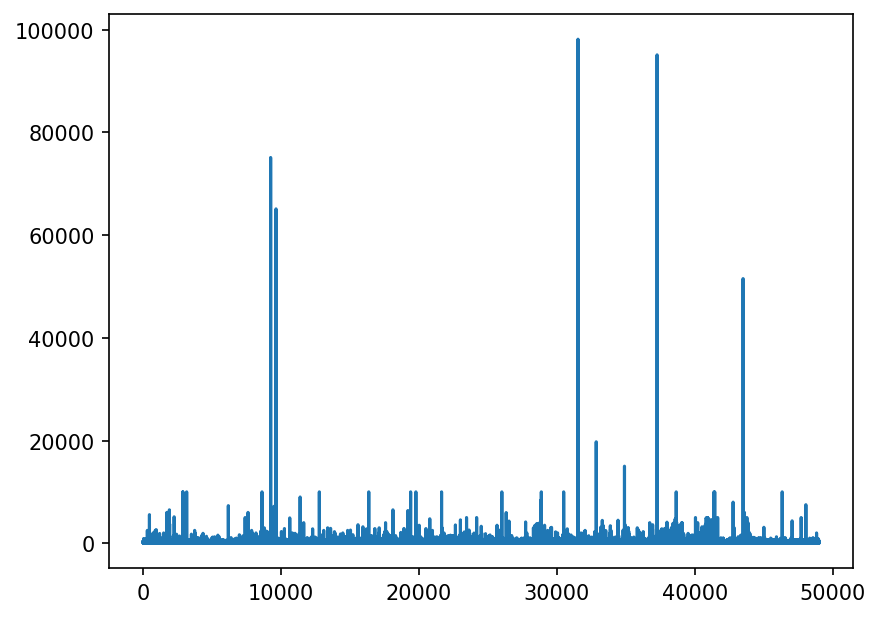

In [226]:
fig = plt.figure(dpi= 150)
plt.plot(final_df['price'])
plt.show()

In [227]:
final_df[final_df['price'] > 10000]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,location
9256,The Parachute Loft Bedrm 1,62605071,Brooklyn,Coney Island,40.577170,-73.999860,Private room,75120,30,New york
9645,"Comfy private room, great location to Manhattan",92493393,Staten Island,West Brighton,40.633040,-74.112750,Private room,65115,2,New york
31527,A cozy one bedroom in ocean hill Brooklyn...,422985413,Brooklyn,Bedford-Stuyvesant,40.681930,-73.916350,Entire home/apt,98159,2,New york
32847,New York Estate,34906299,Manhattan,Upper East Side,40.765260,-73.971710,Entire home/apt,19750,7,New york
34895,Big 2 bedroom two bathroom in a doorman building.,363776653,Manhattan,East Harlem,40.786225,-73.942838,Entire home/apt,15000,21,New york
37257,Zll White Favorite Room,445395972,Bronx,Wakefield,40.886710,-73.864310,Entire home/apt,95110,2,New york
43488,Charming Victorian in the heart of Washington DC,15365907,No Neighbourhood group,"Shaw, Logan Circle",38.911490,-77.021170,Private room,51534,3,Washington D.C


### There are 7 housings in the dataset whose price is above 10000 dollars. These rows are not getting dropped because there might be a chance that hosts may list luxury houses and hence this will be useful for analysis

In [230]:
final_df = final_df.drop(final_df[final_df['price'] > 10000].index, inplace=False)

In [231]:
final_df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,location
0,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,New york
1,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,New york
2,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,New york
3,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,New york
4,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,New york
...,...,...,...,...,...,...,...,...,...,...
49005,A Petite Elegance,81822679,No Neighbourhood group,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,Washington D.C
49006,"Perfect location, wonderful home for a DC stay.",81929011,No Neighbourhood group,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,Washington D.C
49007,Bright cozy room in Columbia Heights rowhouse,18594116,No Neighbourhood group,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,Washington D.C
49008,"Brand New Luxury Studio in Shaw, Pro cleaned",70098073,No Neighbourhood group,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,Washington D.C


In [232]:
final_df[final_df['price'] == 0]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,location
20487,"The Hoxton, Williamsburg - Cosy Room",273324213,Brooklyn,Williamsburg,40.720960,-73.958600,Hotel room,0,1,New york
21001,Mint House At 70 Pine,197053492,Manhattan,Financial District,40.706510,-74.007770,Hotel room,0,1,New york
21010,The James New York - NoMad,268417148,Manhattan,Midtown,40.744590,-73.985740,Hotel room,0,1,New york
21011,Gardens Suites Hotel by Affinia,269311462,Manhattan,Upper East Side,40.764420,-73.963030,Hotel room,0,1,New york
21148,Broadway Plaza Hotel,307634016,Manhattan,Midtown,40.744440,-73.989200,Hotel room,0,1,New york
21152,Carvi Hotel NYC,310429455,Manhattan,Midtown,40.759170,-73.969260,Hotel room,0,30,New york
21154,Hotel Five44,308721299,Manhattan,Hell's Kitchen,40.764040,-73.994780,Hotel room,0,30,New york
21155,Pod Hotel BK,309714886,Brooklyn,Williamsburg,40.715230,-73.959080,Hotel room,0,1,New york
21162,Artezen Hotel,307633956,Manhattan,Financial District,40.709580,-74.008740,Hotel room,0,1,New york
21167,Opera House Hotel,309772430,Bronx,Mott Haven,40.815130,-73.916020,Hotel room,0,30,New york


There are 33 rows where the price of the Airbnb is 0. so dropping these rows

In [233]:
final_df = final_df.drop(final_df[final_df['price'] == 0].index, inplace=False)

In [237]:
final_df.to_excel("final_df.xlsx", index=False)


In [234]:
final_df


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,location
0,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,New york
1,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,New york
2,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,New york
3,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,New york
4,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,New york
...,...,...,...,...,...,...,...,...,...,...
49005,A Petite Elegance,81822679,No Neighbourhood group,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,Washington D.C
49006,"Perfect location, wonderful home for a DC stay.",81929011,No Neighbourhood group,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,Washington D.C
49007,Bright cozy room in Columbia Heights rowhouse,18594116,No Neighbourhood group,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,Washington D.C
49008,"Brand New Luxury Studio in Shaw, Pro cleaned",70098073,No Neighbourhood group,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,Washington D.C


Using these rows for plots in Tableau